# Grouping

Chapter 9 in Python for Data Analysis demonstrates a variety of methods to analyze data via data aggregation and grouping operations. Those are the focus of this session.  Our overall goal for this session is to do Exploratory Data Analysis, which is essentially looking at and probing our data to learn about the patterns we can discover in them.  Often this can generate a better understanding of problems in the data, as well as revealing relationships that might be worth exploring in more depth.


For this exercise, we will use 2010 US Census data, for all census tracts in Kentucky.  A good starting point for any kind of Census data is the American Fact Finder: 

https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

The Census Bureau produces several products, the most famous of which is the decennial census, which as its name implies, is a true Census.  There are a limited number of data fields for the whole population (or at least those that the Census workers are able to reach, which is pretty good).  The Census has other products that are surveys, such as the American Community Survey (ACS) which asks more detailed questions on an annual basis from a 1% sample of households.  

In this case, we are working with file DP-1: Profile of General Population and Housing Characteristics: 2010, which is also a part of something called Summary File 1 (SF-1).  It is for the 100% sample.  A data dictionary for selected fields is below.  

In [7]:
import pandas as pd

# skip the second row, which contains descriptions
sf1 = pd.read_csv('data/DEC_10_SF1_combined.csv', skiprows=[1])

# make the tract, county and state separate
sf1['tract'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[0])
sf1['county'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[1])
sf1['state'] = sf1['GEO.display-label'].apply(lambda x: x.split(sep=',')[2])

# compute some derived fields
sf1['pct_rent'] = sf1['H4-D004'] / sf1['H4-D001'] * 100
sf1['pct_black'] = sf1['P3-D003'] / sf1['P3-D001'] * 100
sf1['pct_asian'] = sf1['P3-D005'] / sf1['P3-D001'] * 100
sf1['pct_white'] = sf1['P3-D002'] / sf1['P3-D001'] * 100
sf1['pct_hisp'] = sf1['P4-D003'] / sf1['P4-D001'] * 100
sf1['pct_vacant'] = sf1['H5-D001'] / sf1['H1-D001'] * 100
sf1[:5]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,...,60,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.000000,97.452229,2.142444,16.794872
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,...,35,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.000000,94.947735,2.613240,25.161290
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,...,106,Census Tract 9703,Adair County,Kentucky,20.521173,0.198939,0.265252,97.612732,1.856764,15.193370
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,...,109,Census Tract 9704.01,Adair County,Kentucky,37.215909,5.823096,0.393120,91.302211,1.547912,10.795743
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,...,70,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542


## Groupby and Aggregation Operations

Groupby is a powerful method in pandas that follows the split-apply-combine approach to data.  As shown in Figure 9-1 in the context of a sum operation, the data is first split into groups that share the same key values.  Then an operation, in this case a sum, is applied to each group.  Then the results are combined.

The built-in aggregation methods available for groupby operations include:
* count
* sum
* mean
* median
* std, var
* min, max
* first, last

You can also apply your own functions as aggregation methods.

![Groupby Operations](groupby.png "Groupby")

Let's apply this approach to computing total population in each county in our dataset.  We can do this in two steps to help explain what is happening.  First we create a groupby object, using county codes to group all the census blocks in sf1 into groups that share the same county code.

In [8]:
grouped = sf1['P1-D001'].groupby(sf1['county'])
grouped

Now that we have this grouping object that represents the **split** part of the workflow in the figure above, we can **apply** operations and **combine** the results using methods like sum:

In [9]:
grouped.sum()

county
 Adair County            18656
 Allen County            19956
 Anderson County         21421
 Ballard County           8249
 Barren County           42173
 Bath County             11591
 Bell County             28691
 Boone County           118811
 Bourbon County          19985
 Boyd County             49542
 Boyle County            28432
 Bracken County           8488
 Breathitt County        13878
 Breckinridge County     20059
 Bullitt County          74319
 Butler County           12690
 Caldwell County         12984
 Calloway County         37191
 Campbell County         90336
 Carlisle County          5104
 Carroll County          10811
 Carter County           27720
 Casey County            15955
 Christian County        73955
 Clark County            35613
 Clay County             21730
 Clinton County          10272
 Crittenden County        9315
 Cumberland County        6856
 Daviess County          96656
                         ...  
 Nicholas County          7135
 

We might want to capture the result in a DataFrame if we want to use it in other processing, like merging the results to the original DataFrame.

In [10]:
county_pop = sf1['P1-D001'].groupby(sf1['county']).sum().to_frame(name='county_population')
county_pop

,county_population
county,
Adair County,18656
Allen County,19956
Anderson County,21421
Ballard County,8249
Barren County,42173
Bath County,11591
Bell County,28691
Boone County,118811
Bourbon County,19985


Here we merge the county total population with sf1 and create a new DataFrame.

In [11]:
sf2 = pd.merge(sf1,county_pop, left_on='county', right_index=True)
sf2[:5]

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant,county_population
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,...,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.000000,97.452229,2.142444,16.794872,18656
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,...,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.000000,94.947735,2.613240,25.161290,18656
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,...,Census Tract 9703,Adair County,Kentucky,20.521173,0.198939,0.265252,97.612732,1.856764,15.193370,18656
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,...,Census Tract 9704.01,Adair County,Kentucky,37.215909,5.823096,0.393120,91.302211,1.547912,10.795743,18656
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,...,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542,18656


## Transforming Data with Groupby

In some cases you may want to apply a function to your data, by group.  An example would be to normalize a column by a mean of each group.  Say we wanted to subtract the mean population density of each county from the population density of each census block. We could write a function to subtract the mean from each value, and then use the transform operation to apply this to each group:

In [46]:
def demean(arr):
    return arr - arr.mean()

Now we can apply this tranformation to columns in our dataframe.  As examples, let's 'demean' the pct_black and pct_rent columns, subtracting the county-wide mean of these values from the tract-specific values, so that the result is transformed to have a mean of zero within each county.

To check the results, we print the means per county, then the original values for the first 5 rows, then the transformed results.  The transformed results we should be able to calculate by subtracting the appropriate county mean from the tract value.

In [47]:
normalized = sf1[['pct_black', 'pct_rent']].groupby(sf1['county']).transform(demean)
print(sf1[['pct_black', 'pct_rent']].groupby(sf1['county']).mean())
print(sf1[['county','pct_black', 'pct_rent']][:5])
print(normalized[:5])

                      pct_black   pct_rent
county                                    
 Adair County          2.104384  22.886621
 Allen County          0.716792  22.312658
 Anderson County       1.419188  20.908477
 Ballard County        2.690326  21.350937
 Barren County         3.385357  29.982273
 Bath County           1.719977  23.865098
 Bell County           2.017470  32.080953
 Boone County          2.362180  24.779530
 Bourbon County        4.863221  33.604963
 Boyd County           2.690429  33.766804
 Boyle County          7.501400  33.987453
 Bracken County        0.319829  24.755274
 Breathitt County      0.291431  20.408091
 Breckinridge County   1.492590  18.524204
 Bullitt County        0.582663  18.852640
 Butler County         0.293354  20.702463
 Caldwell County       4.372987  22.422207
 Calloway County       4.146136  37.944503
 Campbell County       3.106286  34.861471
 Carlisle County       0.752688  17.877812
 Carroll County        1.184510  31.659932
 Carter Cou

We can merge these transformed results on to the original DataFrame, and check the means of the original variables and the tranformed ones.  The transformed ones should be arbitrarily close to zero.

In [48]:
sf2 = pd.merge(sf1,normalized, left_index=True, right_index=True)

sf2.groupby('county')[['pct_black_x', 'pct_black_y', 'pct_rent_x', 'pct_rent_y']].mean()

,pct_black_x,pct_black_y,pct_rent_x,pct_rent_y
county,,,,
Adair County,2.104384,-2.854859e-16,22.886621,-2.030122e-15
Allen County,0.716792,-5.551115e-17,22.312658,-3.256654e-15
Anderson County,1.419188,8.881784e-17,20.908477,7.105427e-16
Ballard County,2.690326,1.480297e-16,21.350937,0.000000e+00
Barren County,3.385357,0.000000e+00,29.982273,4.618528e-15
Bath County,1.719977,0.000000e+00,23.865098,-1.184238e-15
Bell County,2.017470,4.687608e-16,32.080953,-3.947460e-15
Boone County,2.362180,3.595008e-16,24.779530,-1.184238e-15
Bourbon County,4.863221,1.480297e-16,33.604963,0.000000e+00


Apply is a method we have learned previously, which allows us to apply a function to each row in a DataFrame.  We can also combine apply with groupby to apply functions based on group membership.  For example, the function 'top' sorts an array and selects the top n rows from it.  We provide some defaults for the arguments of how many rows, and the column to use for the selection:

In [49]:
def top(df, n=5, column='pct_rent'):
    return df.sort_values(by=column, ascending=False).head(n)

Using this on the full dataset and setting the number of rows and the column to get the top values for, in this case using pct_rent to override the default argument, we get the top 10 tracts in the region in terms of percentage rental.

In [50]:
top(sf1, n=10, column='pct_rent')

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
255,1400000US21061980100,21061980100,"Census Tract 9801, Edmonson County, Kentucky",8,8,8,0,0,0,0,...,0,Census Tract 9801,Edmonson County,Kentucky,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000
508,1400000US21111003000,21111003000,"Census Tract 30, Jefferson County, Kentucky",3565,3565,258,3187,15,1,16,...,7,Census Tract 30,Jefferson County,Kentucky,99.768697,89.396914,0.028050,7.237027,1.290323,7.883523
200,1400000US21047201501,21047201501,"Census Tract 2015.01, Christian County, Kentucky",5315,5315,3580,982,64,47,81,...,8,Census Tract 2015.01,Christian County,Kentucky,99.698568,18.476011,0.884290,67.356538,14.995296,7.072829
415,1400000US21093000202,21093000202,"Census Tract 2.02, Hardin County, Kentucky",4514,4514,3053,863,45,78,20,...,21,Census Tract 2.02,Hardin County,Kentucky,99.679230,19.118299,1.727957,67.634027,14.842712,5.957768
872,1400000US21163970200,21163970200,"Census Tract 9702, Meade County, Kentucky",2683,2683,1916,414,41,30,15,...,161,Census Tract 9702,Meade County,Kentucky,99.270960,15.430488,1.118151,71.412598,15.803205,32.980456
201,1400000US21047201502,21047201502,"Census Tract 2015.02, Christian County, Kentucky",4527,4527,3055,740,45,61,84,...,6,Census Tract 2015.02,Christian County,Kentucky,98.896435,16.346366,1.347471,67.483985,18.003093,6.507937
414,1400000US21093000201,21093000201,"Census Tract 2.01, Hardin County, Kentucky",1409,1409,1150,153,9,19,6,...,60,Census Tract 2.01,Hardin County,Kentucky,98.620690,10.858765,1.348474,81.618169,10.432931,28.571429
833,1400000US21151010500,21151010500,"Census Tract 105, Madison County, Kentucky",4182,4182,3699,330,11,56,6,...,7,Census Tract 105,Madison County,Kentucky,96.078431,7.890961,1.339072,88.450502,1.673840,8.602151
270,1400000US21067000801,21067000801,"Census Tract 8.01, Fayette County, Kentucky",4094,4094,3255,385,6,356,2,...,13,Census Tract 8.01,Fayette County,Kentucky,95.617530,9.404006,8.695652,79.506595,2.002931,36.775819
142,1400000US21037050100,21037050100,"Census Tract 501, Campbell County, Kentucky",1733,1733,1197,368,1,43,0,...,11,Census Tract 501,Campbell County,Kentucky,94.527363,21.234853,2.481246,69.070975,3.693018,7.903780


Below we apply this with groupby and use the defaults for n and column, and it applies the function within each county and concatenates the results, producing the top 5 blocks on pop_sqmi for each county in the region.

In [ ]:
sf1.groupby('county').apply(top)

Here we pass arguments to the function to set n and the column to select the top value from.

In [45]:
sf1.groupby('county').apply(top, n=1, column='P1-D001')

NameError: name 'top' is not defined

## Exploring Correlations in the Data

Pandas provides simple ways of computing correlation coefficients among the columns in your DataFrame.  If you use corr() on a full DF, it will produce a large correlation table.  A bit hard to navigate and you mostly would not be interested in some of these results.

In [6]:
sf1.corr()

,GEO.id2,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,P3-D007,P3-D008,...,H5-D005,H5-D006,H5-D007,H5-D008,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
GEO.id2,1.000000,0.049408,0.049408,0.063873,-0.024147,0.001960,-0.048639,-0.031018,-0.020234,-0.045010,...,0.077670,0.076772,0.010594,0.119563,-0.061820,-0.033330,-0.058690,0.045403,-0.022668,0.043711
P1-D001,0.049408,1.000000,1.000000,0.929708,0.150379,0.479878,0.324468,0.192667,0.240640,0.581058,...,0.308361,0.012925,-0.023479,0.202435,-0.062520,-0.070055,0.136213,0.043546,0.058258,-0.300937
P3-D001,0.049408,1.000000,1.000000,0.929708,0.150379,0.479878,0.324468,0.192667,0.240640,0.581058,...,0.308361,0.012925,-0.023479,0.202435,-0.062520,-0.070055,0.136213,0.043546,0.058258,-0.300937
P3-D002,0.063873,0.929708,0.929708,1.000000,-0.213918,0.363714,0.209791,0.095243,0.057796,0.351332,...,0.376236,0.064984,0.014118,0.236156,-0.257852,-0.391277,0.031737,0.382284,-0.115163,-0.289514
P3-D003,-0.024147,0.150379,0.150379,-0.213918,1.000000,0.252784,0.158195,0.171271,0.325919,0.497941,...,-0.145718,-0.120118,-0.089171,-0.003757,0.464467,0.899663,0.132016,-0.899986,0.302933,0.011119
P3-D004,0.001960,0.479878,0.479878,0.363714,0.252784,1.000000,0.131467,0.463373,0.299747,0.565977,...,0.057503,0.000613,-0.035805,0.090925,0.184507,0.114453,0.060946,-0.170683,0.299351,-0.015777
P3-D005,-0.048639,0.324468,0.324468,0.209791,0.158195,0.131467,1.000000,0.176404,0.160199,0.399051,...,-0.082495,-0.075145,-0.105767,-0.302912,0.163496,0.054982,0.923845,-0.172315,0.178430,-0.222993
P3-D006,-0.031018,0.192667,0.192667,0.095243,0.171271,0.463373,0.176404,1.000000,0.281407,0.523912,...,-0.069520,-0.049845,-0.029479,-0.106864,0.255751,0.099153,0.155861,-0.174929,0.339602,-0.039314
P3-D007,-0.020234,0.240640,0.240640,0.057796,0.325919,0.299747,0.160199,0.281407,1.000000,0.504998,...,-0.108742,-0.086525,-0.017210,-0.124005,0.305578,0.192686,0.134676,-0.334419,0.843366,-0.086896
P3-D008,-0.045010,0.581058,0.581058,0.351332,0.497941,0.565977,0.399051,0.523912,0.504998,1.000000,...,-0.029011,-0.118407,-0.088460,-0.130512,0.425299,0.307009,0.306124,-0.413328,0.466302,-0.216524


It is easy to compute correlation coeffients for a subset of columns.

In [ ]:
sf1[['pct_rent', 'pct_vacant']].corr()

And this method can be combined with groupby to compute correlation tables by group.

In [ ]:
sf1.groupby('county')[['pct_rent', 'pct_vacant']].corr()

## Your turn to practice:

Count the number of census blocks per county.

Calculate total households per county.

Calculate percent renters by county. (Careful not to calculate the mean percent rental across blocks in a county)

Calculate percent vacant by county.

Calculate mean, min and max vacancy rate (at the block level) by county.

Calculate the 90th percentile of vacancy rate (at the block level) by county.

In [12]:
county1 = sf1['tract'].groupby(sf1['county']).count().to_frame(name='county_num_tracts')
county1.head()

,county_num_tracts
county,
Adair County,7
Allen County,6
Anderson County,5
Ballard County,3
Barren County,10


In [13]:
county2 = sf1['H1-D001'].groupby(sf1['county']).sum().to_frame(name='county_num_households')
county2.head()

,county_num_households
county,
Adair County,8568
Allen County,9307
Anderson County,9127
Ballard County,3885
Barren County,19188


In [14]:
county3 = sf1['H4-D004'].groupby(sf1['county']).sum().to_frame(name = 'county_rent')
county3['tot_units'] = sf1['H4-D001'].groupby(sf1['county']).sum()
county3['percent_rent'] = county3['county_rent']/county3['tot_units']*100 
county3.head()

,county_rent,tot_units,percent_rent
county,,,
Adair County,1860,7285,25.531915
Allen County,1898,7848,24.184506
Anderson County,2067,8369,24.698291
Ballard County,727,3397,21.401236
Barren County,5449,16999,32.054827


In [15]:
county3 = sf1['H3-D003'].groupby(sf1['county']).sum().to_frame(name = 'county_vac')
county3['tot_units'] = sf1['H4-D001'].groupby(sf1['county']).sum()
county3['percent_vac'] = county3['county_vac']/county3['tot_units']*100
county3.head()

,county_vac,tot_units,percent_vac
county,,,
Adair County,1283,7285,17.611531
Allen County,1459,7848,18.590724
Anderson County,758,8369,9.057235
Ballard County,488,3397,14.365617
Barren County,2189,16999,12.877228


In [16]:
import numpy as np
county3['max_vac'] = sf1['pct_vacant'].groupby(sf1['county']).max()
county3['min_vac'] = sf1['pct_vacant'].groupby(sf1['county']).min()
county3['mean_vac'] = sf1['pct_vacant'].groupby(sf1['county']).mean()
county3['90th_vac'] =sf1['pct_vacant'].groupby(sf1['county']).quantile(0.9)

county3

C:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,county_vac,tot_units,percent_vac,max_vac,min_vac,mean_vac,90th_vac
county,,,,,,,
Adair County,1283,7285,17.611531,25.161290,10.795743,15.868316,20.649714
Allen County,1459,7848,18.590724,27.559055,9.254975,15.808521,22.324254
Anderson County,758,8369,9.057235,13.452028,5.492297,8.927276,12.075984
Ballard County,488,3397,14.365617,14.648603,11.608392,12.640382,14.051713
Barren County,2189,16999,12.877228,22.975207,7.457767,11.444842,15.985510
Bath County,818,4587,17.833006,15.959953,13.480392,14.852074,15.791138
Bell County,1367,11787,11.597523,14.950980,7.796194,10.308518,12.192074
Boone County,2938,43216,6.798408,12.572614,2.615519,6.499883,NaN
Bourbon County,951,7976,11.923270,15.599639,6.934445,11.112101,15.100240


## Some review:

I've included in the data folder a shapefile with the Census geographies.  Can you use it to: 

1. Calculate the population density of each Census tract and county in Kentucky. 
2. Make a choropleth showing the population density.  

In [17]:
import geopandas as gp

In [18]:
sf1.head()

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,H5-D008,tract,county,state,pct_rent,pct_black,pct_asian,pct_white,pct_hisp,pct_vacant
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,...,60,Census Tract 9701,Adair County,Kentucky,17.411402,0.810654,0.000000,97.452229,2.142444,16.794872
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,...,35,Census Tract 9702,Adair County,Kentucky,19.252874,2.380952,0.000000,94.947735,2.613240,25.161290
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,...,106,Census Tract 9703,Adair County,Kentucky,20.521173,0.198939,0.265252,97.612732,1.856764,15.193370
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,...,109,Census Tract 9704.01,Adair County,Kentucky,37.215909,5.823096,0.393120,91.302211,1.547912,10.795743
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,...,70,Census Tract 9704.02,Adair County,Kentucky,30.911681,4.224360,0.375499,92.701244,1.900962,11.642542


In [19]:
tracts = gp.GeoDataFrame.from_file('data/gz_2010_21_140_00_500k.shp')

In [20]:
tracts['area'] = tracts.area

In [21]:
tracts.head()

,CENSUSAREA,COUNTY,GEO_ID,LSAD,NAME,STATE,TRACT,geometry,area
0,74.333,035,1400000US21035010700,Tract,107,21,010700,"POLYGON ((-88.43010642581829 36.500896307, -88...",0.019464
1,0.205,037,1400000US21037050100,Tract,501,21,050100,"POLYGON ((-84.50608223252529 39.0950807457157,...",0.000083
2,0.186,037,1400000US21037050400,Tract,504,21,050400,"POLYGON ((-84.483948 39.09684, -84.48150699999...",0.000050
3,0.433,037,1400000US21037052100,Tract,521,21,052100,"POLYGON ((-84.4935547013056 39.1027204798606, ...",0.000161
4,0.452,037,1400000US21037052200,Tract,522,21,052200,"POLYGON ((-84.46285999999999 39.099847, -84.46...",0.000123


In [22]:
sf2 = pd.merge(sf1,tracts,left_on = 'GEO.id',right_on = 'GEO_ID',)

In [23]:
#pop density of each county
county3['pop'] = sf1['P1-D001'].groupby(sf1['county']).sum()
county3['AREA'] =sf2['CENSUSAREA'].groupby(sf2['county']).sum()
county3['pop_den'] = county3['pop']/county3['AREA']
print(county3.head())

#pop density of each tract
sf2['pop_den'] = sf2['P1-D001']/sf2['CENSUSAREA']
sf2.head()

                  county_vac  tot_units  percent_vac    max_vac    min_vac  \
county                                                                       
 Adair County           1283       7285    17.611531  25.161290  10.795743   
 Allen County           1459       7848    18.590724  27.559055   9.254975   
 Anderson County         758       8369     9.057235  13.452028   5.492297   
 Ballard County          488       3397    14.365617  14.648603  11.608392   
 Barren County          2189      16999    12.877228  22.975207   7.457767   

                   mean_vac   90th_vac    pop     AREA     pop_den  
county                                                              
 Adair County     15.868316  20.649714  18656  405.283   46.032032  
 Allen County     15.808521  22.324254  19956  344.337   57.954852  
 Anderson County   8.927276  12.075984  21421  201.832  106.132823  
 Ballard County   12.640382  14.051713   8249  246.659   33.442931  
 Barren County    11.444842  15.985510 

,GEO.id,GEO.id2,GEO.display-label,P1-D001,P3-D001,P3-D002,P3-D003,P3-D004,P3-D005,P3-D006,...,CENSUSAREA,COUNTY,GEO_ID,LSAD,NAME,STATE,TRACT,geometry,area,pop_den
0,1400000US21001970100,21001970100,"Census Tract 9701, Adair County, Kentucky",1727,1727,1683,14,1,0,1,...,67.730,001,1400000US21001970100,Tract,9701,21,970100,POLYGON ((-85.18837499999999 37.30695499999999...,0.018597,25.498302
1,1400000US21001970200,21001970200,"Census Tract 9702, Adair County, Kentucky",1722,1722,1635,41,5,0,0,...,40.270,001,1400000US21001970200,Tract,9702,21,970200,"POLYGON ((-85.44617199999999 37.140449, -85.43...",0.011336,42.761361
2,1400000US21001970300,21001970300,"Census Tract 9703, Adair County, Kentucky",3016,3016,2944,6,11,8,0,...,73.943,001,1400000US21001970300,Tract,9703,21,970300,"POLYGON ((-85.10521899999999 37.107729, -85.13...",0.019522,40.788175
3,1400000US21001970401,21001970401,"Census Tract 9704.01, Adair County, Kentucky",4070,4070,3716,237,1,16,1,...,40.684,001,1400000US21001970401,Tract,9704.01,21,970401,"POLYGON ((-85.31824899999999 37.110148, -85.31...",0.010748,100.039327
4,1400000US21001970402,21001970402,"Census Tract 9704.02, Adair County, Kentucky",4261,4261,3950,180,16,16,3,...,25.877,001,1400000US21001970402,Tract,9704.02,21,970402,"POLYGON ((-85.30613099999999 37.102643, -85.30...",0.006846,164.663601


In [24]:
sf3 = pd.merge

In [29]:
import folium
import pandas as pd
%matplotlib inline

map = folium.Map(location=[48, -102], zoom_start=3)

In [27]:
tracts['pop_den'] = sf2['pop_den']

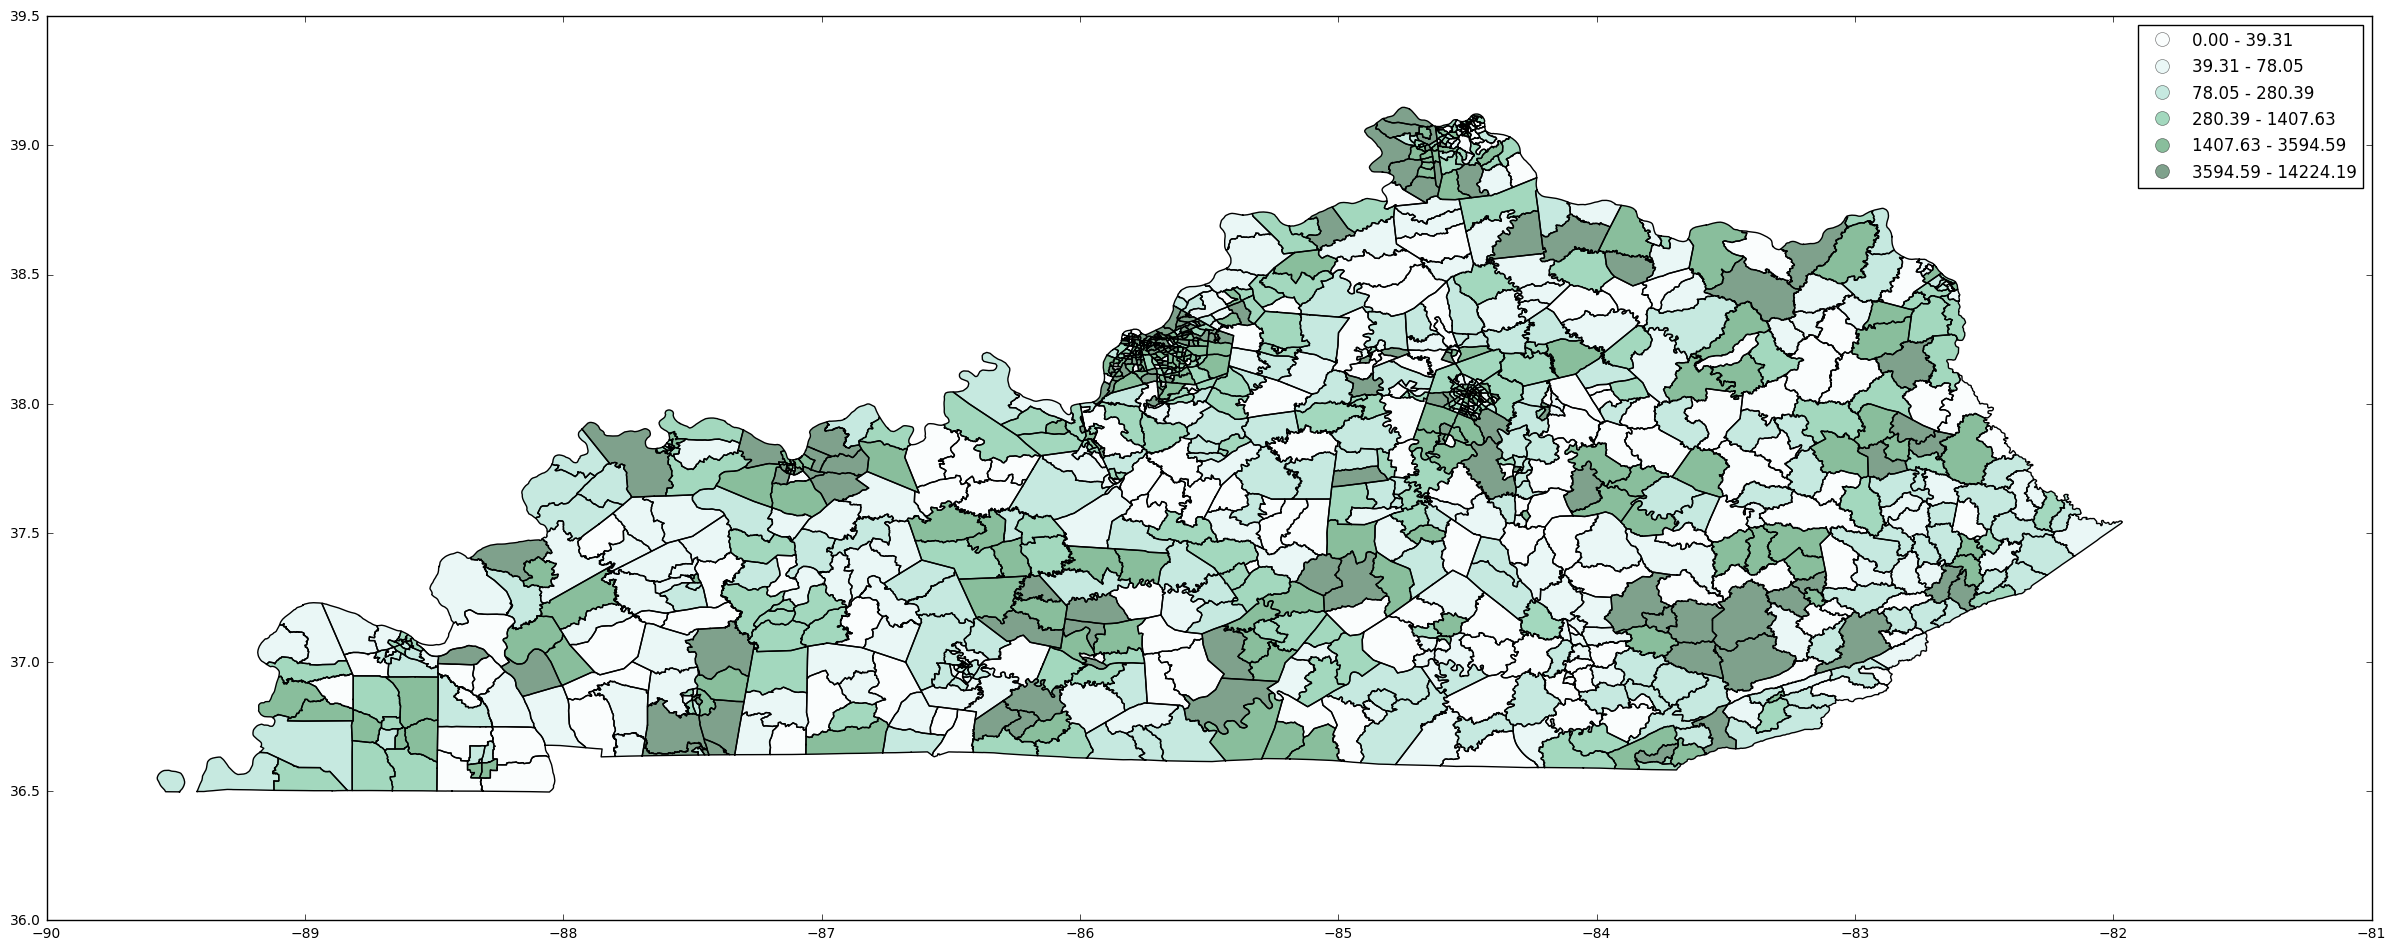

In [30]:
tracts.plot(column='pop_den', scheme='QUANTILES', k=6, cmap='BuGn', legend=True, figsize=(30, 30))

In [34]:
map.choropleth(data = tracts, columns = 'pop_den',key_on = 'geometry',fill_color = 'PuBu',line_color = 'PuBu')

KeyError: 'p'

In [ ]:
import folium
import pandas as pd

state_geo = r'data/us-states.json'
state_unemployment = r'data/US_Unemployment_Oct2012.csv'

state_data = pd.read_csv(state_unemployment)

#Let Folium determine the scale
map.geo_json(geo_path=state_geo, data=state_data,
             columns=['State', 'Unemployment'],
             key_on='feature.id',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Unemployment Rate (%)')
map.create_map(path='us_states.html')